In [1]:
import geopandas as gpd # for geospatial data handling
import pandas as pd
import osmnx as ox # for handling data from OpenStreetMap (osm) with the help of networkX (nx)
import contextily as cx # for plotting
import matplotlib.pyplot as plt # for plotting
from pyproj import CRS # for more advanced CRS modifications and transformations
from shapely.geometry import Polygon
import numpy as np
import pandana as pdna
import os
from tqdm import tqdm

In [ ]:
# RUN ONLY ONCE TO SAVE THE GRAPHS - ALREADY DONE

# graphs = {}

# # specify parameters for the analysis
# walk_time = 15  # max walking horizon in minutes
# walk_speed = 5  # km per hour
# walk_time_sec = walk_time * 60 # We need the time in seconds to match how travel time is calculated in OSMnx

# # Loop through the neighborhoods
# for neighborhood in tqdm(neighbourhoods):
#     # Create a graph for the current neighborhood
#     G_walk_neighborhood = ox.graph_from_place(neighborhood, network_type='walk') # type of transportation is set here

#     for u, v, data in G_walk_neighborhood.edges(data=True):
#         data['speed_kph'] = walk_speed
#     G_walk_neighborhood = ox.add_edge_travel_times(G_walk_neighborhood) # this computes the travel time in seconds based on the 'speed_kph' column

# # caro path
#     # ox.save_graphml(G_walk_neighborhood, f"/Users/caro/Desktop/SPRING24/GDS/PROJECT/graphs/G_walk_{neighborhood}.graphml") # save graph per neighbourhood
# # michel path
#     ox.save_graphml(G_walk_neighborhood, f"../graphs/G_walk_{neighborhood}.graphml") # save graph per neighbourhood
#     # Store the graph in the dictionary using the neighborhood name as the key
#     graphs[neighborhood] = G_walk_neighborhood

In [2]:
graphs = {}
# graphs_dir = '/Users/caro/Desktop/SPRING24/GDS/PROJECT/GDS_project/graphs'
graphs_dir = '../graphs'

if graphs == {}:
    for file_name in tqdm(os.listdir(graphs_dir)):
        if file_name.endswith(".graphml"):
            neighborhood = file_name.replace("G_walk_", "").replace(".graphml", "")
            file_path = os.path.join(graphs_dir, file_name)
            G_walk_neighborhood = ox.load_graphml(file_path)
            graphs[neighborhood] = G_walk_neighborhood

100%|██████████| 18/18 [00:22<00:00,  1.23s/it]


In [6]:
pandanas = {}

if pandanas == {}:
    # Build Pandana network for each neighborhood
    for neighborhood, graph in tqdm(graphs.items()):
        graph = ox.project_graph(graph, to_crs='EPSG:25832')
        nodes = ox.graph_to_gdfs(graph, edges=False)[['x', 'y']]
        edges = ox.graph_to_gdfs(graph, nodes=False).reset_index()[['u', 'v', 'travel_time']]

        network = pdna.Network(node_x=nodes['x'],
                                node_y=nodes['y'], 
                                edge_from=edges['u'],
                                edge_to=edges['v'],
                                edge_weights=edges[['travel_time']])
        
        pandanas[neighborhood] = network

  6%|▌         | 1/18 [00:02<00:43,  2.54s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 9639
Setting CH edge vector of size 30838
Range graph removed 31100 edges of 61676
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 11%|█         | 2/18 [00:05<00:46,  2.91s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 14281
Setting CH edge vector of size 46136
Range graph removed 46506 edges of 92272
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 17%|█▋        | 3/18 [00:10<00:53,  3.59s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 14970
Setting CH edge vector of size 48624
Range graph removed 48876 edges of 97248
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 22%|██▏       | 4/18 [00:10<00:33,  2.36s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 2588
Setting CH edge vector of size 8290
Range graph removed 8386 edges of 16580
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 28%|██▊       | 5/18 [00:13<00:31,  2.42s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 9720
Setting CH edge vector of size 31244
Range graph removed 31622 edges of 62488
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 33%|███▎      | 6/18 [00:15<00:27,  2.31s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 12319
Setting CH edge vector of size 38440
Range graph removed 38976 edges of 76880
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 39%|███▉      | 7/18 [00:16<00:21,  1.93s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 3382
Setting CH edge vector of size 10774
Range graph removed 10912 edges of 21548
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 44%|████▍     | 8/18 [00:16<00:14,  1.47s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 3200
Setting CH edge vector of size 9782
Range graph removed 9918 edges of 19564
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

 50%|█████     | 9/18 [00:17<00:10,  1.18s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 3603
Setting CH edge vector of size 11218
Range graph removed 11360 edges of 22436
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 56%|█████▌    | 10/18 [00:17<00:07,  1.01it/s]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 3795
Setting CH edge vector of size 11622
Range graph removed 11734 edges of 23244
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

 61%|██████    | 11/18 [00:20<00:10,  1.45s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 10411
Setting CH edge vector of size 33610
Range graph removed 33746 edges of 67220
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 67%|██████▋   | 12/18 [00:23<00:11,  1.94s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 8890
Setting CH edge vector of size 29956
Range graph removed 30224 edges of 59912
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 72%|███████▏  | 13/18 [00:23<00:07,  1.42s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 1552
Setting CH edge vector of size 4430
Range graph removed 4700 edges of 8860
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

 78%|███████▊  | 14/18 [00:26<00:07,  1.98s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 13822
Setting CH edge vector of size 43760
Range graph removed 44322 edges of 87520
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 83%|████████▎ | 15/18 [00:27<00:04,  1.55s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 3761
Setting CH edge vector of size 11500
Range graph removed 11874 edges of 23000
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

 89%|████████▉ | 16/18 [00:31<00:04,  2.20s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 16731
Setting CH edge vector of size 55202
Range graph removed 55584 edges of 110404
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 94%|█████████▍| 17/18 [00:31<00:01,  1.62s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 1441
Setting CH edge vector of size 4694
Range graph removed 4774 edges of 9388
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

100%|██████████| 18/18 [00:33<00:00,  1.84s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 6417
Setting CH edge vector of size 20386
Range graph removed 20608 edges of 40772
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


In [10]:
# store all graphs already
#G_walk = ox.graph_from_place('Anjou, Montreal, Quebec, Canada', network_type='walk')
#G_bike = ox.graph_from_place('Anjou, Montreal, Quebec, Canada', network_type='bike')
#G_drive = ox.graph_from_place('Anjou, Montreal, Quebec, Canada', network_type='drive')

In [7]:
list_of_amenities = ['restaurant', 'cafe', 'pharmacy']

for amenity in list_of_amenities:
    tags = {'amenity': [amenity]}
    print(tags)

{'amenity': ['restaurant']}
{'amenity': ['cafe']}
{'amenity': ['pharmacy']}


In [8]:
place = 'Montreal, Canada'
list_of_amenities = ['restaurant', 'cafe', 'pharmacy']
tags = {'amenity': list_of_amenities}

In [9]:
def get_walking_distances(amenities_list):
    place = 'Montreal, Canada'
    amenities = ox.features_from_place(place, tags=tags)
    amenities = amenities.to_crs('EPSG:25832')

    # Dictionary to store centroids for each amenity
    centroids_per_amenity = {}

    # Loop through each amenity category
    for amenity in list_of_amenities:
        # Filter amenities for the current category
        amenities_category = amenities[amenities['amenity'] == amenity]
        # Calculate centroids for the current category
        centroids_category = amenities_category.centroid
        # Store centroids for the current category in the dictionary
        centroids_per_amenity[amenity] = centroids_category

    # graphs_dir = '/Users/caro/Desktop/SPRING24/GDS/PROJECT/GDS_project/graphs'
    graphs_dir = '../graphs'

    walk_graphs = {}
    for file_name in tqdm(os.listdir(graphs_dir)):
        if file_name.endswith(".graphml"):
            neighborhood = file_name.replace("G_walk_", "").replace(".graphml", "")
            file_path = os.path.join(graphs_dir, file_name)
            G_walk_neighborhood = ox.load_graphml(file_path)
            graphs[neighborhood] = G_walk_neighborhood
                

    walk_pandanas = {}
    # Build Pandana network for each neighborhood
    for neighborhood, graph in tqdm(graphs.items()):
        graph = ox.project_graph(graph, to_crs='EPSG:25832')
        nodes = ox.graph_to_gdfs(graph, edges=False)[['x', 'y']]
        edges = ox.graph_to_gdfs(graph, nodes=False).reset_index()[['u', 'v', 'travel_time']]
        
        network = pdna.Network(node_x=nodes['x'],
                                node_y=nodes['y'], 
                                edge_from=edges['u'],
                                edge_to=edges['v'],
                                edge_weights=edges[['travel_time']])
        
        pandanas[neighborhood] = network


    walk_time = 15  # max walking horizon in minutes
    walk_speed = 5  # km per hour
    walk_time_sec = walk_time * 60 # We need the time in seconds to match how travel time is calculated in OSMnx


    walking_distances = {}
    for neighborhood, pandana in tqdm(pandanas.items()):
        pandana.set_pois(category='cafe', # amenity set here
                        maxdist=walk_time_sec,
                        maxitems=3,
                        x_col=centroids_per_amenity['cafe'].x, 
                        y_col=centroids_per_amenity['cafe'].y)
        
        distances = pandana.nearest_pois(distance=walk_time_sec,
                                        category='cafe', # amenity set here
                                        num_pois=3)
        
        distances['travel_time'] = distances[1] / 60
        walking_distances[neighborhood] = distances

  6%|▌         | 1/18 [00:02<00:39,  2.34s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 9639
Setting CH edge vector of size 30838
Range graph removed 31100 edges of 61676
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 11%|█         | 2/18 [00:05<00:48,  3.01s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 14281
Setting CH edge vector of size 46136
Range graph removed 46506 edges of 92272
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 17%|█▋        | 3/18 [00:10<00:53,  3.58s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 14970
Setting CH edge vector of size 48624
Range graph removed 48876 edges of 97248
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 22%|██▏       | 4/18 [00:10<00:32,  2.35s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 2588
Setting CH edge vector of size 8290
Range graph removed 8386 edges of 16580
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 28%|██▊       | 5/18 [00:12<00:29,  2.30s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 9720
Setting CH edge vector of size 31244
Range graph removed 31622 edges of 62488
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 33%|███▎      | 6/18 [00:15<00:28,  2.36s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 12319
Setting CH edge vector of size 38440
Range graph removed 38976 edges of 76880
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 39%|███▉      | 7/18 [00:15<00:19,  1.79s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 3382
Setting CH edge vector of size 10774
Range graph removed 10912 edges of 21548
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 44%|████▍     | 8/18 [00:16<00:13,  1.38s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 3200
Setting CH edge vector of size 9782
Range graph removed 9918 edges of 19564
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

 50%|█████     | 9/18 [00:16<00:10,  1.12s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 3603
Setting CH edge vector of size 11218
Range graph removed 11360 edges of 22436
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 56%|█████▌    | 10/18 [00:17<00:08,  1.09s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 3795
Setting CH edge vector of size 11622
Range graph removed 11734 edges of 23244
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

 61%|██████    | 11/18 [00:19<00:09,  1.38s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 10411
Setting CH edge vector of size 33610
Range graph removed 33746 edges of 67220
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 67%|██████▋   | 12/18 [00:22<00:10,  1.80s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 8890
Setting CH edge vector of size 29956
Range graph removed 30224 edges of 59912
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 72%|███████▏  | 13/18 [00:22<00:06,  1.32s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 1552
Setting CH edge vector of size 4430
Range graph removed 4700 edges of 8860
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

 78%|███████▊  | 14/18 [00:25<00:07,  1.85s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 13822
Setting CH edge vector of size 43760
Range graph removed 44322 edges of 87520
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 83%|████████▎ | 15/18 [00:26<00:04,  1.59s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 3761
Setting CH edge vector of size 11500
Range graph removed 11874 edges of 23000
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

 89%|████████▉ | 16/18 [00:30<00:04,  2.30s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 16731
Setting CH edge vector of size 55202
Range graph removed 55584 edges of 110404
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 94%|█████████▍| 17/18 [00:31<00:01,  1.69s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 1441
Setting CH edge vector of size 4694
Range graph removed 4774 edges of 9388
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

100%|██████████| 18/18 [00:32<00:00,  1.79s/it]


Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 6417
Setting CH edge vector of size 20386
Range graph removed 20608 edges of 40772
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


100%|██████████| 18/18 [00:01<00:00, 14.69it/s]


In [10]:
G_walk_anjou = graphs['Anjou, Montreal, Canada'] # access one graph
pandana_anjou = pandanas['Anjou, Montreal, Canada'] # access one pandana network
walking_distances_anjou = walking_distances['Anjou, Montreal, Canada']

G_walk_villemarie = graphs['Ville-Marie, Montreal, Canada'] # access one graph
pandana_villemarie = pandanas['Ville-Marie, Montreal, Canada'] # access one pandana network
walking_distances_illemarie = walking_distances['Ville-Marie, Montreal, Canada']

In [11]:
# function for plotting
def plot_neighborhood_graph(mode_of_transportation_graph, mode_of_transportation_distances, neighbourhood):
    # Load the graph from the specified place and network type
    G = mode_of_transportation_graph
    # CRS
    G_proj = ox.project_graph(G)
    
    distances = mode_of_transportation_distances[f"{neighbourhood}, Montreal, Canada"]
    
    # Plot the graph with a light background
    fig, ax = ox.plot_graph(G_proj, figsize=(10, 8), bgcolor='white', edge_color='#CCCCCC', edge_linewidth=0.5, node_size=0, show=False, close=False)
    
    # Assuming 'nodes_anjou' is a DataFrame containing node positions and 'distances_anjou' contains the data to plot
    nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
    
    # Scatter plot on the same Axes instance
    sc = ax.scatter(x=nodes_proj["x"], y=nodes_proj["y"], c=distances['travel_time'], s=10, cmap='inferno_r', alpha=0.8)
    
    # Add colorbar
    plt.colorbar(sc, ax=ax, shrink=0.7)
    
    # Show the plot
    plt.show()


In [12]:
walking_distances.keys()

dict_keys(['Mercier–Hochelaga-Maisonneuve, Montreal, Canada', 'Côte-des-Neiges–Notre-Dame-de-Grâce, Montreal, Canada', 'Rosemont–La Petite-Patrie, Montreal, Canada', 'Outremont, Montreal, Canada', 'Le Sud-Ouest, Montreal, Canada', 'Saint-Laurent, Montreal, Canada', 'Verdun, Montreal, Canada', 'Anjou, Montreal, Canada', 'Saint-Léonard, Montreal, Canada', 'Lachine, Montreal, Canada', 'Villeray–Saint-Michel–Parc-Extension, Montreal, Canada', 'Le Plateau-Mont-Royal, Montreal, Canada', "L'Île_Bizard_Sainte_Geneviève, Montreal, Canada", 'Ville-Marie, Montreal, Canada', 'Rivière-des-Prairies–Pointe-aux-Trembles, Montreal, Canada', 'Ahuntsic-Cartierville, Montreal, Canada', 'Montréal-Nord, Montreal, Canada', 'LaSalle, Montreal, Canada'])

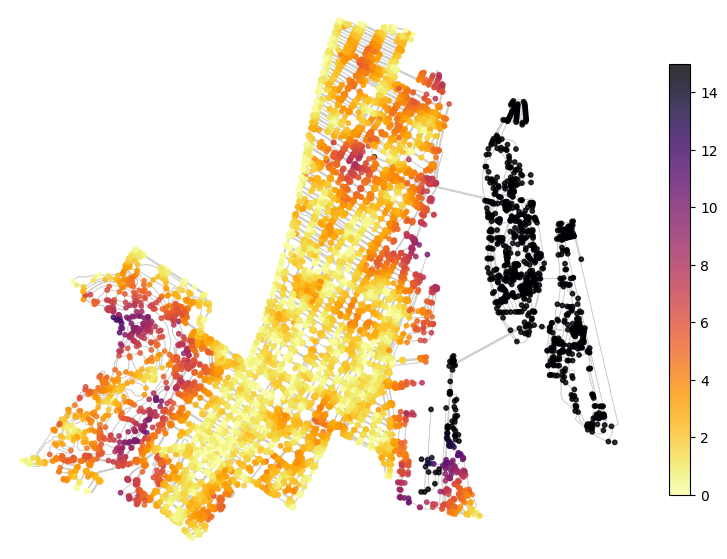

In [13]:
# example usage
plot_neighborhood_graph(G_walk_villemarie, walking_distances, 'Ville-Marie')

In [24]:
walking_distances['Anjou, Montreal, Canada']['travel_time'].mean() # restaurants

6.589771848365432

In [36]:
walking_distances['Ville-Marie, Montreal, Canada']['travel_time'].mean() # restaurants

2.2069084312059934

In [62]:
walking_distances['Anjou, Montreal, Canada']['travel_time'].mean() # cafes

7.245119159491112

In [63]:
walking_distances['Ville-Marie, Montreal, Canada']['travel_time'].mean() # cafes

3.314090150087297

In [ ]:
df = pd.DataFrame(walking_distances) # Now df contains all the walking distances for each amenity in each neighborhood
neighborhood = 'Mercier–Hochelaga-Maisonneuve, Montreal, Canada'
amenity = 'restaurant'

# Filter the DataFrame based on the specified neighborhood and amenity
filtered_distances = df.loc[neighborhood, amenity]